Paquetes Necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. 800x800, con la textura del tablero de ajedrez

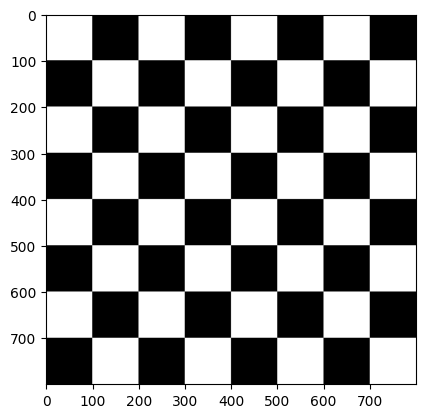

In [2]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco) DE 800X800
tablero = np.zeros((800, 800, 1), dtype = np.uint8)

#La variable x nos indicará si estamos en una fila par o impar del tablero
x = 0
for j in range(0, 800, 100):
    for i in range(0, 800, 200): 
        #Si estamos en una fila par el primer cuadrado de la fila será blaco, sino será negro
        if x%2 == 0:
            tablero[j:j+100, i: i + 100, 0] = 255
        else: 
            tablero[j:j+100, i + 100: i + 200, 0] = 255
    x+=1
    
#Visualiza con mapa de color gris
plt.imshow(tablero, cmap='gray') 
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/)

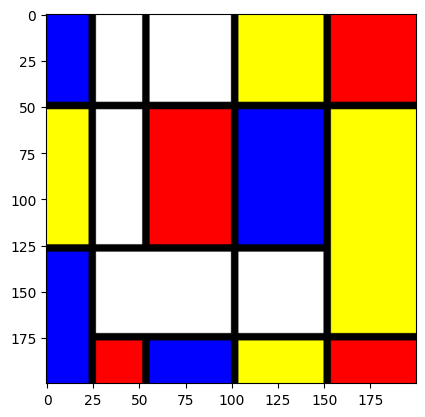

In [3]:
#Crea una imagen con tres planos
mondrian = np.zeros((200,200,3), dtype = np.uint8)

#Ponemos el fondo de la imagen en blanco 
mondrian[:,:,:] = 255 

#Lineas negras en vertical 
mondrian[:, 23:27, :] = 0
mondrian[:125, 52:56, :] = 0
mondrian[177:, 52:56, :] = 0
mondrian[:, 100:104, :] = 0
mondrian[:, 150:154, :] = 0

#Lineas negras en horizontal
mondrian[48:52, :, : ] = 0
mondrian[125:129, :150, : ] = 0
mondrian[173:177, 27:, : ] = 0

#Rectángulos rojos
mondrian[52:125, 56:100] = [255, 0, 0]
mondrian[0:48, 154:] = [255, 0, 0]
mondrian[177:, 154:] = [255, 0, 0]
mondrian[177:, 27:52] = [255, 0, 0]

#Rectángulos azules
mondrian[129:, 0:23] = [0, 0, 255]
mondrian[177:, 56:100] = [0, 0, 255]
mondrian[52:125, 104:150] = [0, 0, 255]
mondrian[0:48, 0:23] = [0, 0, 255]

#Rectángulos amarillos
mondrian[0:48, 104:150] = [255, 255, 0]
mondrian[177:, 104:150] = [255, 255, 0]
mondrian[52:125, :23] = [255, 255, 0]
mondrian[52:173, 154:] = [255, 255, 0]

#Mondrian
plt.imshow(mondrian) 
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV

TAREA: Modifica de alguna forma los valores de un plano de la imagen

In [4]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    if ret:  

        #Modificamos el plano azúl de la imagen asignando 255 a cada píxel
        frame[:,:,0] = 255

        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [5]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
  
    if ret:  

        # Pasamos cada frame a escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Encontramos las cordenadas con valores minimos y maximos
        min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(gray_frame)

        # Pintamos un círculo negro en el pixel con menor valor
        cv2.circle(frame, min_loc, 20, (5,6,8), thickness=7)

        # Pintamos un círculo blanco en el pixel con mayor valor
        cv2.circle(frame, max_loc, 20, (245,248,248), thickness=7)

        # Muestra fotograma
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Haz tu propuesta pop art

In [6]:
vid = cv2.VideoCapture(0)

frames = []

num_previous_frames = 10

while(True):      

    # Fotograma a fotograma
    ret, frame = vid.read()

    if ret:

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Se guarda el frame actual en la lista frames
        frames.append(frame)

        # Nos aseguramos de mantener sólo los 10 últimos
        if len(frames) > num_previous_frames:
            frames.pop(0) 

        # Creamos un canvas en el que mostraremos la acumulación de los frames
        blended_frame = np.zeros_like(frame)

        # Juntamos los distintos frames de la lista frame en uno sólo mediante la operación or
        for i in frames:
            blended_frame |= i 

        # Muestra fotograma
        cv2.imshow('Vid', blended_frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break 

# Libera el objeto de captura
vid.release()

# Destruye ventanas
cv2.destroyAllWindows()